# <center> Hamiltoniano para semimetales de Weyl tipo I - Koshino </center>


El **objetivo general** de este notebook es explorar el Hamiltoniano presentado en el Review[1] 

Los conceptos a introducir serán:
* Hamiltoniano para un semimetal del Weyl y uno de punto nodal
* Relación de dispersión generada por este tipo de materiales

A diferencia de los hamiltonianos explorados anteriormente, este es de una matriz de $4x4$ porque considera al término de masa. Adicionalmente, este notebook se enfocara sólo en la fase correspondiente al semimemtal de Weyl tipo I.

---
<sup>Fuente: Mikito Koshino and Intan Fatimah Hizbullah
Phys. Rev. B 93, 045201 – Published 4 January 2016; Erratum Phys. Rev. B 99, 209903 (2019)</sup>


# <center> Hamiltoniano del sistema</center>
<center> 

\begin{eqnarray}
H(p) = \left[
\begin{array}{cc}
 m\sigma_0 + b\sigma_z & v\sigma \cdot p\\
v\sigma \cdot p &  -m\sigma_0 + b\sigma_z
\end{array}
\right]
\end{eqnarray}



---

#### <center>  Expresión de la forma exponencial 


\begin{eqnarray}
H(k) = \left[
\begin{array}{cc}
 m+b & 0 &v\hbar (\frac{e^{ik_za}-e^{-ik_za}}{2i}) & v\hbar (\frac{e^{ik_xa}-e^{-ik_xa}}{2i})- i\hbar v (\frac{e^{ik_ya}-e^{-ik_ya}}{2i}) \\
0 & m-b & v\hbar (\frac{e^{ik_xa}-e^{-ik_xa}}{2i})+ i\hbar v (\frac{e^{ik_ya}-e^{-ik_ya}}{2i}) & v\hbar (\frac{e^{ik_za}-e^{-ik_za}}{2i})  \\
v\hbar (\frac{e^{ik_za}-e^{-ik_za}}{2i}) & v\hbar (\frac{e^{ik_xa}-e^{-ik_xa}}{2i})- i\hbar v (\frac{e^{ik_ya}-e^{-ik_ya}}{2i}) & -m+b & 0\\
 v\hbar (\frac{e^{ik_xa}-e^{-ik_xa}}{2i})+ i\hbar v (\frac{e^{ik_ya}-e^{-ik_ya}}{2i})& v\hbar (\frac{e^{ik_za}-e^{-ik_za}}{2i}) &0 & -m-b 
\end{array}
\right]
\end{eqnarray}





Acerca de la notación:

* $b$: es el campo intrinseco de Zeeman
 
* $v$: es el parametro de velocidad.
 
* $m$: es la masa

In [8]:
import glob
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
from pylab import *
from pythtb import *

In [9]:
mpl.rcParams.update({'font.size': 22, 'text.usetex': True})
mpl.rcParams.update({'axes.linewidth':1.5})
mpl.rcParams.update({'axes.labelsize':'large'})
mpl.rcParams.update({'xtick.major.size':12})
mpl.rcParams.update({'xtick.minor.size':6})
mpl.rcParams.update({'ytick.major.size':12})
mpl.rcParams.update({'ytick.minor.size':6})
mpl.rcParams.update({'xtick.major.width':1.5})
mpl.rcParams.update({'xtick.minor.width':1.0})
mpl.rcParams.update({'ytick.major.width':1.5})
mpl.rcParams.update({'ytick.minor.width':1.0})

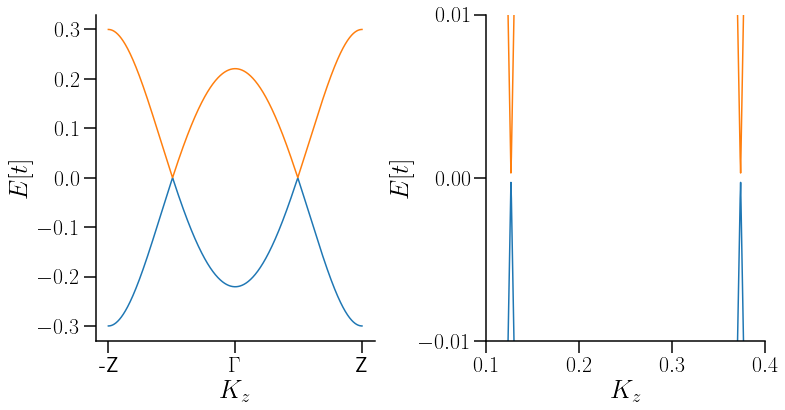

In [10]:

m = 0.7
b = 1.0
v = 1.0
a = 1.0
ħ = 1.0

##################----------------Inicia TB----------------##################
lat= [[a,0,0],[0,a,0],[0,0,a]]
orb= [[1/2,1/2,1/2],[0,0,0],[0,0,0],[1/2,1/2,1/2]] #H, solo los sitios A[000] B1/2[111]

PWSM = tb_model(3,3,lat,orb)


#FUERA DE LA DIAGONAL

#(0,2)=vhsink_z
PWSM.set_hop(+v*ħ/(2*1J), 0, 2, [0,0,1] )
PWSM.set_hop(-v*ħ/(2*1J), 0, 2, [0,0,-1])
#(1,3)=-vhsink_z
PWSM.set_hop(-v*ħ/(2*1J) ,1 , 3, [0,0,1])
PWSM.set_hop(+v*ħ/(2*1J) ,1 , 3, [0,0,-1])

#(0,3)X=vh sink_x-hiv sinky
PWSM.set_hop(+v*ħ/(2*1J) ,0 , 3, [+1,0,0])
PWSM.set_hop(-v*ħ/(2*1J),0 , 3, [-1,0,0])
#(0,3)Y=vh sink_x-hiv sinky
PWSM.set_hop(-v*ħ/2 ,0 , 3, [0,+1,0])
PWSM.set_hop(+v*ħ/2 ,0 , 3, [0,-1,0])

#(1,2)X=vh sink_x+hiv sinky
PWSM.set_hop(+v*ħ/(2*1J) ,1 , 2, [+1,0,0])
PWSM.set_hop(-v*ħ/(2*1J) ,1 , 2, [-1,0,0])
#(1,2)Y=vh sink_x+hiv sinky
PWSM.set_hop(+v*ħ/2 ,1 , 2, [0,+1,0])
PWSM.set_hop(-v*ħ/2 ,1 , 2, [0,-1,0])

#DIAGONAL
#m+b
PWSM.set_onsite([m+b,m-b,-m+b,-m-b]) # No hay hooping, es energia

###############---------Inicia extraccion de información-----------##############
k=[[0,0.0,0],[0,0,0.25],[0,0,0.5]]#Punto por los cuales que quiero que pase. Son los punto de al simetria
                                 #unidades en unidades de V de red 1=2pi/a

                                 #unidades en unidades de V de red 1=2pi/a
k_label=["-Z",r"$\Gamma$","Z"]
(k_vec,k_dist,k_node)=PWSM.k_path(k,1001,report=False)
Ek,U=PWSM.solve_all(k_vec,eig_vectors=True)

#######################---Graficos----######################
 
fig,ax  = plt.subplots(ncols=2,nrows=1,figsize=(12,6),
                       gridspec_kw = {'wspace':0.4, 'hspace':0, 'width_ratios': [1, 1]})
ax[0].plot(k_dist,Ek[1,:],zorder=1,lw=1.5)
ax[0].plot(k_dist,Ek[2,:],zorder=1,lw=1.5)
ax[0].set_xticks(k_node) # puntos de alta simetria, valor que correspomde en k_path
ax[0].set_xticklabels(k_label )
# ax[0].set_yticks([-2,0.,2])
# xsticklabels(k_label) 

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel(r"$E[t]$",fontsize=26)
ax[0].set_xlabel(r"$K_z$",fontsize=26)


k=[[0,0,0],[0,0,0.5]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
                                 #unidades en unidades de V de red 1=2pi/a

(k_vec,k_dist,k_node)=PWSM.k_path(k,1001,report=False)
Ek,U=PWSM.solve_all(k_vec,eig_vectors=True)
ax[1].plot(k_dist,Ek[1,:],zorder=1,lw=1.5)
ax[1].plot(k_dist,Ek[2,:],zorder=1,lw=1.5)
 # puntos de alta simetria, valor que correspomde en k_path
a=0.01
ax[1].set_yticks([-a,0.,a])
ax[1].set_ylim([-a,a])
ax[1].set_xlim([0.1,0.4])
# xsticklabels(k_label) 

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel(r"$E[t]$",fontsize=26)
ax[1].set_xlabel(r"$K_z$",fontsize=26)

savefig("WSMKoshinoBulkGap.pdf",bbox_inches="tight")



En este Hamiltoniano se observa una relacion de dispersion propia d eun semimetal de Weyl tipo I. Adicionalmente, se observa una brecha energetica alrededor de $E[t]=0$

Ahora se analizará el comportamiento de la estructura de bandas en un sistema finito en una dirección e infinito en dos direcciones

## Exploración de las bandas de semimetal de Weyl

Para estudiar cómo se comportan las bandas en distintos planos del material, es necesario pensr que nuestro muestra es un sistema cubico infinito, es decir tiene simetria de traslación en la dirección $X, Y,Z$. Ahora, si se desea estudiar al sistema en $X$, se debe cortar en esa dirección, es decir, se debe romper la simetria de traslación en $X$, pero amnteniendola en $Y$ y en $Z$. Esto mismo aplica cuandos e quieres estudiar en $Y$ y $Z$, se deben romper las simetrías respectivas.

```{note}
Representación de la ruptura de simetría de traslación
{glue:figure}`WSM_finite_systems-1.png`
```


In [11]:
NY_WSM=PWSM.cut_piece(100,1,glue_edgs=False) 
NX_WSM=PWSM.cut_piece(100,0,glue_edgs=False)
NZ_WSM=PWSM.cut_piece(100,2,glue_edgs=False)

In [12]:

k=[[0,0.0],[0.0,0.25],[0,.5]]                                
k_label1=[r"$-Z$",r"$\Gamma$",r"$Z$"hide-input]
(k_vec,k_dist,k_node)=NX_WSM.k_path(k,101, report=False)
EkfinX=NX_WSM.solve_all(k_vec)
k=[[0,0.0],[0.25,0],[.5,0]]  
k_label2=[r"$-X$",r"$\Gamma$",r"$X$"]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinY=NY_WSM.solve_all(k_vec)
k_label3=[r"$-Y$",r"$\Gamma$",r"$Y$"]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,101, report=False)
EkfinZ=NZ_WSM.solve_all(k_vec)


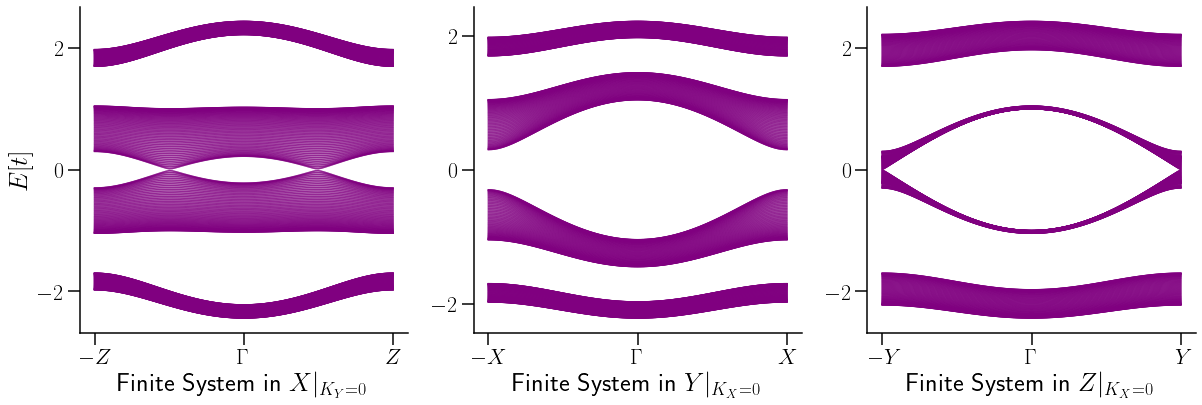

In [13]:
fig,ax  = plt.subplots(ncols=3,nrows=1,figsize=(20,6),
                       gridspec_kw = {'wspace':0.2, 'hspace':0, 'width_ratios': [1, 1,1]})
for n in range(0, len(EkfinX)):
    
    ax[0].plot(k_dist,EkfinX[n,:], c='purple', alpha=0.6) #la long de Ek fin tiene todo
    ax[1].plot(k_dist,EkfinY[n,:], c='purple', alpha=0.6) #la long de Ek fin tiene todo
    ax[2].plot(k_dist,EkfinZ[n,:], c='purple', alpha=0.6) #la long de Ek fin tiene todo

for i in range(0,3):
    ax[i].set_xticks(k_node) # puntos de alta simetria, valor que correspomde en k_path
    
    ax[i].set_yticks([-2,0.,2])
    # xsticklabels(k_label) 

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
ax[0].set_xticklabels(k_label1 )
ax[1].set_xticklabels(k_label2 )
ax[2].set_xticklabels(k_label3 )
ax[0].set_ylabel(r"$E[t]$",fontsize=26)
ax[0].set_xlabel(r"Finite System in $X|_{K_Y=0}$",fontsize=26)
ax[1].set_xlabel(r"Finite System in $Y|_{K_X=0}$",fontsize=26)
ax[2].set_xlabel(r"Finite System in $Z|_{K_X=0}$",fontsize=26)

# puntos de alta simetria, valor que correspomde en k_path

savefig("Finite_systems_Koshino.pdf",bbox_inches='tight')


Se denota que los conos de Dirac sólo aparecen cuando el sistema es finito en la dirección $X$ y con un recorrido en $Z$. Sin embargo, no hay estados de superficie.